ラグランジュの未定乗数法だと帰属度がマイナスの値取ってしまう1/10

In [20]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み、一行目はヘッダーじゃない
df = pd.read_csv("output.csv",header=None)
#クラスタ数宣言
c=2
#Kはクラスタサイズ
K=5
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納

X_size,dimension = X.shape


centroids = X[np.random.choice(X_size,c)]
distances=np.zeros((X_size,c))

In [22]:
#dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
d=[]
for i in range(X_size):
    for j in range(c):
        d.append(np.sum((X[i]-centroids[j])**2))
d = [0.0000000001 if i == 0 else i for i in d]

In [3]:
d

[0.037423585556,
 0.03822570388899998,
 0.041559295555999985,
 0.032134479444999975,
 0.08647597555599998,
 0.00010137944500000041,
 0.04569999999999999,
 0.030344904444999977,
 0.16898525111199994,
 0.08168416388899997,
 0.08857832444499997,
 1e-10,
 0.28432386497800005,
 0.14067954388900006,
 0.09769999999999997,
 0.04101150444499998,
 0.143128944445,
 0.05780138777800003,
 1e-10,
 0.08857832444499997]

In [47]:
#dを小数第3位で四捨五入
#d = [round(d[n], 2) for n in range(len(d))] 

In [48]:
d

[0.034870411111999976,
 0.034195399444999997,
 0.028999999999999974,
 0.030694438889000017,
 1e-10,
 0.053361218889000014,
 0.027225695555999976,
 0.02751202444500001,
 0.07641761555599996,
 0.002075713888999991,
 0.00010137944500000041,
 0.05780138777800003,
 0.13465901557800003,
 0.024758896689000005,
 0.03705889555599997,
 0.004345224445000007,
 0.053361218889000014,
 1e-10,
 0.08647597555599998,
 0.143128944445]

In [23]:
from sympy import diff,symbols,solve
#距離dの定数定義
#d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19\
#= symbols("d0 d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 \
#d11 d12 d13 d14 d15 d16 d17 d18 d19")
#帰属度uの変数定義
u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14,u15,u16,u17,u18,u19\
= symbols("u0 u1 u2 u3 u4 u5 u6 u7 u8 u9 u10 \
u11 u12 u13 u14 u15 u16 u17 u18 u19")
#条件式の変数定義
g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11\
= symbols("g0 g1 g2 g3 g4 g5 g6 g7 g8 g9 g10 g11")
#ラムダ変数の定義
l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11\
= symbols("l0 l1 l2 l3 l4 l5 l6 l7 l8 l9 l10 l11")

In [24]:
f = u0**2*d[0] + u1**2*d[1] + u2**2*d[2] + u3**2*d[3] + u4**2*d[4] + u5**2*d[5] +\
u6**2*d[6] + u7**2*d[7] + u8**2*d[8] + u9**2*d[9] + u10**2*d[10] + u11**2*d[11] +\
u12**2*d[12] + u13**2*d[13] + u14**2*d[14] + u15**2*d[15] + u16**2*d[16] + u17**2*d[17] +\
u18**2*d[18]+ u19**2*d[19]
f

0.037423585556*u0**2 + 1.0e-10*u1**2 + 0.088578324445*u10**2 + 0.038225703889*u11**2 + 0.284323864978*u12**2 + 0.115661594978*u13**2 + 0.0977*u14**2 + 0.014240305556*u15**2 + 0.143128944445*u16**2 + 0.034195399445*u17**2 + 1.0e-10*u18**2 + 0.037423585556*u19**2 + 0.041559295556*u2**2 + 0.000320171112*u3**2 + 0.086475975556*u4**2 + 0.034870411112*u5**2 + 0.0457*u6**2 + 0.000740305555999999*u7**2 + 0.168985251112*u8**2 + 0.047694735556*u9**2

In [25]:
#帰属度が1になる制約式
g0 = u0 + u1 -1
g1 = u2 + u3 -1
g2 = u4 + u5 -1
g3 = u6 + u7 -1
g4 = u8 + u9 -1
g5 = u10 + u11 -1
g6 = u12 + u13 -1
g7 = u14 + u15 -1
g8 = u16 + u17 -1
g9 = u18 + u19 -1
#クラスタサイズがcになる制約式
g10 = u0+u2+u4+u6+u8+u10+u12+u14+u16+u18-5
#g11 = u1+u3+u5+u7+u9+u11+u13+u15+u17+u19-5

In [26]:
# 定理式に代入
theor = f-l0*g0-l1*g1-l2*g2-l3*g3-l4*g4-l5*g5-l6*g6-l7*g7-l8*g8-l9*g9-l10*g10
# 各変数で偏微分する
diff_u0 = diff(theor, u0)
diff_u1 = diff(theor, u1)
diff_u2 = diff(theor, u2)
diff_u3 = diff(theor, u3)
diff_u4 = diff(theor, u4)
diff_u5 = diff(theor, u5)
diff_u6 = diff(theor, u6)
diff_u7 = diff(theor, u7)
diff_u8 = diff(theor, u8)
diff_u9 = diff(theor, u9)
diff_u10 = diff(theor, u10)
diff_u11 = diff(theor, u11)
diff_u12 = diff(theor, u12)
diff_u13 = diff(theor, u13)
diff_u14 = diff(theor, u14)
diff_u15 = diff(theor, u15)
diff_u16 = diff(theor, u16)
diff_u17 = diff(theor, u17)
diff_u18 = diff(theor, u18)
diff_u19 = diff(theor, u19)

diff_l0 = diff(theor, l0)
diff_l1 = diff(theor, l1)
diff_l2 = diff(theor, l2)
diff_l3 = diff(theor, l3)
diff_l4 = diff(theor, l4)
diff_l5 = diff(theor, l5)
diff_l6 = diff(theor, l6)
diff_l7 = diff(theor, l7)
diff_l8 = diff(theor, l8)
diff_l9 = diff(theor, l9)
diff_l10 = diff(theor, l10)
#diff_l11 = diff(theor, l11)

In [8]:
diff_l9

-u18 - u19 + 1

In [10]:
print([diff_u0, diff_u1, diff_u2, diff_u3, diff_u4, diff_u5, diff_u6, diff_u7, diff_u8, diff_u9, diff_u10, diff_u11,\
             diff_u12, diff_u13, diff_u14, diff_u15, diff_u16, diff_u17, diff_u18, diff_u19, diff_l0, diff_l1, diff_l2,\
             diff_l3, diff_l4, diff_l5, diff_l6, diff_l7, diff_l8, diff_l9, diff_l10, diff_l11])

[-l0 - l10 + 0.000640342223999999*u0, -l0 - l11 + 0.0953894711119999*u1, -l1 - l10 + 2.0e-10*u2, -l1 - l11 + 0.089068111112*u3, -l10 - l2 + 0.0579999999999999*u4, -l11 - l2 + 0.152835231112*u5, -l10 - l3 + 0.000218031112*u6, -l11 - l3 + 0.082003382224*u7, -l10 - l4 + 0.089068111112*u8, -l11 - l4 + 2.0e-10*u9, -l10 - l5 + 0.0642689588899999*u10, -l11 - l5 + 0.163368327778*u11, -l10 - l6 + 0.220049791156*u12, -l11 - l6 + 0.029990581156*u13, -l10 - l7 + 0.023884431112*u14, -l11 - l7 + 0.021669782224*u15, -l10 - l8 + 0.061388877778*u16, -l11 - l8 + 0.00415142777799998*u17, -l10 - l9 + 0.083118591112*u18, -l11 - l9 + 0.337970502224*u19, -u0 - u1 + 1, -u2 - u3 + 1, -u4 - u5 + 1, -u6 - u7 + 1, -u8 - u9 + 1, -u10 - u11 + 1, -u12 - u13 + 1, -u14 - u15 + 1, -u16 - u17 + 1, -u18 - u19 + 1, -u0 - u10 - u12 - u14 - u16 - u18 - u2 - u4 - u6 - u8 + 5, -u1 - u11 - u13 - u15 - u17 - u19 - u3 - u5 - u7 - u9 + 5]


In [27]:
res = solve([diff_u0, diff_u1, diff_u2, diff_u3, diff_u4, diff_u5, diff_u6, diff_u7, diff_u8, diff_u9, diff_u10, diff_u11,\
             diff_u12, diff_u13, diff_u14, diff_u15, diff_u16, diff_u17, diff_u18, diff_u19, diff_l0, diff_l1, diff_l2,\
             diff_l3, diff_l4, diff_l5, diff_l6, diff_l7, diff_l8,diff_l9, diff_l10])

In [28]:
res

{l0: 9.99627262597830e-11,
 l1: 0.000349234501202513,
 l10: 0.0374375346260973,
 l2: 0.0389417727566531,
 l3: 0.000860216410152290,
 l4: 0.0661521197036272,
 l5: 0.0421190206624788,
 l6: 0.153607129787143,
 l7: 0.0200949404428607,
 l8: 0.0479827598255695,
 l9: -0.0374375343260600,
 u0: 0.500186368701085,
 u1: 0.499813631298915,
 u10: 0.449074622866536,
 u11: 0.550925377133464,
 u12: 0.335963118023918,
 u13: 0.664036881976082,
 u14: 0.294434365757206,
 u15: 0.705565634242794,
 u16: 0.298403285173710,
 u17: 0.701596714826290,
 u18: 1.50018636335686,
 u19: -0.500186363356862,
 u2: 0.454612724082188,
 u3: 0.545387275917812,
 u4: 0.441621542235674,
 u5: 0.558378457764326,
 u6: 0.419012593394416,
 u7: 0.580987406605584,
 u8: 0.306505016408406,
 u9: 0.693494983591594}

In [13]:
l_list=[]
l_list.extend([res[l0],res[l1],res[l2],res[l3],res[l4],res[l5],res[l6],res[l7],res[l8],res[l10],res[l11]])

In [14]:
l_list

[l9 + 0.0529743009787368,
 l9 + 0.0535193469951948,
 l9 + 0.0307992705762155,
 l9 + 0.0548811912744114,
 l9 + 0.130783002320601,
 l9 + 0.030632619139942,
 l9 + 0.208719944408068,
 l9 + 0.0793478152859887,
 l9 + 0.104168033838034,
 2.34582522492334e-10 - l9,
 -l9 - 0.0306326189745245]

In [15]:
u_list=[]
u_list.extend([res[u0],res[u1],res[u2],res[u3],res[u4],res[u5],res[u6],res[u7],res[u8],res[u9],res[u10],res[u11],\
        res[u12],res[u13],res[u14],res[u15],res[u16],res[u17],res[u18],res[u19]])

In [16]:
u_list

[0.898003579248763,
 0.101996420751237,
 0.897220732686087,
 0.102779267313913,
 0.681484187118577,
 0.318515812881423,
 0.886010398588250,
 0.113989601411750,
 -0.102779262822968,
 1.10277926282297,
 0.677454801072347,
 0.322545198927653,
 0.0833314474044983,
 0.916668552595502,
 0.274736984480600,
 0.725263015519400,
 -0.0763335965745040,
 1.07633359657450,
 0.780870728798350,
 0.219129271201650]

In [17]:
u = np.array(u_list)

In [36]:
u

array([0.707766244552510, 0.292233755447490, 0.643891414829945,
       0.356108585170055, 0.178079926897460, 0.821920073102540,
       0.600450672964923, 0.399549327035077, 0.386965731312560,
       0.613034268687440, 0.172912614719558, 0.827087385280442,
       0.367046123016794, 0.632953876983206, 0.406078892121654,
       0.593921107878346, 0.363895767122929, 0.636104232877071,
       1.17291261246167, -0.172912612461669], dtype=object)

In [18]:
u_list = u.reshape([10,2])
print(u_list)

[[0.898003579248763 0.101996420751237]
 [0.897220732686087 0.102779267313913]
 [0.681484187118577 0.318515812881423]
 [0.886010398588250 0.113989601411750]
 [-0.102779262822968 1.10277926282297]
 [0.677454801072347 0.322545198927653]
 [0.0833314474044983 0.916668552595502]
 [0.274736984480600 0.725263015519400]
 [-0.0763335965745040 1.07633359657450]
 [0.780870728798350 0.219129271201650]]


In [38]:
type(u_list)

numpy.ndarray

In [39]:
np.sum(u_list,axis=1)

array([1.00000000000000, 1.00000000000000, 1.00000000000000,
       1.00000000000000, 1.00000000000000, 1.00000000000000,
       1.00000000000000, 1.00000000000000, 1.00000000000000,
       1.00000000000000], dtype=object)

In [40]:
for i in range(0,20,2):
    print(u[i]+u[i+1])
print(u[0]+u[2]+u[4]+u[6]+u[8]+u[10]+u[12]+u[14]+u[16]+u[18])
print(u[1]+u[3]+u[5]+u[7]+u[9]+u[11]+u[13]+u[15]+u[17]+u[19])

1.00000000000000
1.00000000000000
1.00000000000000
1.00000000000000
1.00000000000000
1.00000000000000
1.00000000000000
1.00000000000000
1.00000000000000
1.00000000000000
5.00000000000000
5.00000000000000


In [41]:
#分母計算(クラスタサイズになるはず)
v0_denominator=0
v1_denominator=0
for i in range(0,20,2):
    v0_denominator += u[i]
for i in range(1,20,2):
    v1_denominator += u[i]
#print(v0_denominator,v1_denominator)
#分子計算
v0_numerator = 0
v1_numerator = 0
for i in range(10):
    v0_numerator += u[i*2]*X[i]
    v1_numerator += u[1+i*2]*X[i]
#print(v0_numerator,v1_numerator)
v=[0 for i in range(2)]
v[0] = v0_numerator / v0_denominator
v[1] = v1_numerator / v1_denominator
print("クラスター中心はcluster1:{},cluster2:{}".format(v[0],v[1]))

クラスター中心はcluster1:[0.527233610399947 0.515477157530712],cluster2:[0.624426389600053 0.570689642469288]


In [42]:
cluster = [0 for i in range(10)]
for i in range (10):
    if u[i*2]>u[1+i*2]:
        cluster[i] = 0
    else:
        cluster[i] = 1
np_cluster =np.array(cluster)
print(np_cluster)

[0 0 1 0 1 1 1 1 1 0]


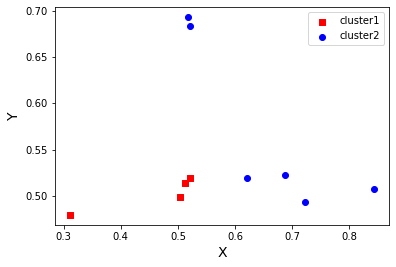

In [43]:
#グラフ
colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
#clusterはnp.array型じゃないとダメそう(リスト型だとグラフに描画されなかった)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])

#ax.set_title('fecbo', size=16)
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2'])  # 凡例を表示

plt.show()

fig.savefig("img2d.pdf")